In [1]:
import torch 
import numpy as np

### Images

- 28 x 28 pixels
- Shape (Chanel, width, height) -> (1, 28, 28)
- Channels typically 1,3,4
- Lot of images (batch, channel, width, height) -> (32, 1, 28, 28)
- Batch size (Usually 16)
    - Too small batch size - Takes time, Convergence 
    - Too big batch size - Could run out of memory
    - In theory big batch size finish training first
- No. of layers?
    - 1 Layer - Simple pattern, underfitting
    - More Layer - Complex pattern - can lead to overfitting
- Hidden neuron
    - One hidden neuron - simple relationship
        - Underfitting
    - Many hidden neuron - complex relationship
        - Overfitting or 
        - Never converge
    - Each neuron is a LinReg of features - feature enginnering
    - 5 neurons - find 5 prominent combinations to minimize the loss
- Designing NN is an "Art"


- Liner layer wants (m,n), sklearn
- Image is (32,1,28,28)
    - So change to (32, 1*28*28) -> (32, 784) -> Flatterning
    - 32 is the batch size


### Lets design our NN
layer1 = Linear(input_size, hidden/out_size)

layer1 = (784, 89)

act1 = ReLu() #Sigmoid()

layer2 = (89, 10)

act2 = ReLu() #Sigmoid()

- Why 89? 

- Why we need activation function?
    - Add non-linearity

- Activation functions
    - Sigmoid
    - ReLu - max(input, 0)
    - Leaky ReLu

- How to choose activation function
    - Their gradients
    - Sigmoid - Biggest gradient - 0.2
        - Many sigmoid -> 02...* 0.2 *.... -> dj/dw will be very small - W updates very slowly - > vanishing gradient
    - tanh - Maximum gradient = 1 (In a very narrow window it is 1)
    - max(input, 0) - gradient = 1 (always 1)

In [3]:
import torch   #general pytorch
import torch.nn as nn  #neural network module
import torch.nn.functional as F  #useful functions like softmax, or relu

#pip install torchvision; conda install torchvision
from torchvision import datasets, transforms  #transforms for image processing
from torch.utils.data import DataLoader       #dataloader for preparing batch

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#!pip install torchvision

## 1. ETL

In [6]:
#load the dataset
#DON'T FOLLOW MY ../data, put where you want.....

#train basically mean is this training set?
#download is download....
#transform means do you want to apply any processing to these images

#for the transform, we gonna just convert to tensor
transform = transforms.ToTensor()  #this NOT only converts to tensor, but also 
#converts from 0 to 255 to 0 to 1

train = datasets.MNIST(root="../data", train=True, download=True, transform = transform)

In [7]:
test = datasets.MNIST(root="../data", train=False, download=True, transform = transform)

In [9]:
from torch.utils.data import DataLoader

In [11]:
#set the seed for reproducibility in shuffling
torch.manual_seed(999)   #why 999?

#set the dataloader
batch_size = 100  #how do i know 100?  because Chaky's PC
#format: DataLoader(dataset, batch_size, shuffle)
train_loader = DataLoader(train, batch_size = batch_size, shuffle=True)
test_loader  = DataLoader(test,  batch_size = batch_size, shuffle=True)

#Note:  In good practice, you MUST also have val_loader, but I am lazy today, because
#i want to keep things simple; I will show val_loader when we use CNN for MNIST....


In [14]:
for images, targets in train_loader:
    print(images.shape) #(100, 1, 28, 28)
    print(targets.shape) #(100)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


## 2. EDA

Labels:  [1 7 8 1 8 4 0 3 0 7 1 0]


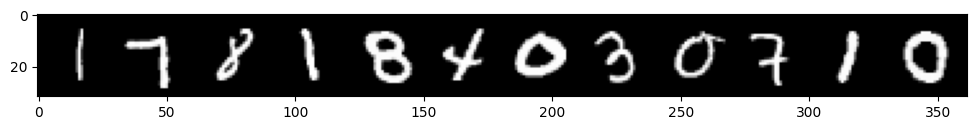

In [16]:
#so let's try to print out some images......in a grid form
from torchvision.utils import make_grid

#we already have 100 images, and 100 targets
print("Labels: ", targets[:12].numpy())

#plot the images....
im = make_grid(images[:12], nrow=12)   #default nrow is 8

#imshow takes either (W, H) or (W, H, C)
#our images are (C, W, H), so we need to change the position; using `tranpose()`
im_transpose = np.transpose(im, (1, 2, 0))  #why (1, 2, 0) because C now because the last guy
plt.figure(figsize=(12, 8))
plt.imshow(im_transpose)

## 3. Training

In [ ]:
# Please create a network

#Layer 1 = liners layer of shape (784, 89)
#Layer 2 = relu (use F.relu())
#Layer 3 = linear layer of shape (89,10)

In [35]:
class NeuralNetwork(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__() # Inherit everything in nn.Module
        self.layer1 = nn.Linear(input_size, hidden_size) #(784,89)
        self.layer2 = nn.Linear(hidden_size, output_size) #(89,10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)  # After here you do not have to softmax
                                # Because pytorch cross entrophy loss combines softmax + cross entrophy
        return out

In [36]:
input_size = 784
hidden_size = 89
output_size = 10

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
#print("Device: ", device)

model = NeuralNetwork(  input_size  ,  hidden_size   ,  output_size ).to(device)
model

NeuralNetwork(
  (layer1): Linear(in_features=784, out_features=89, bias=True)
  (layer2): Linear(in_features=89, out_features=10, bias=True)
  (relu): ReLU()
)

In [37]:
for p in model.parameters():
    print(p.shape)

torch.Size([89, 784])
torch.Size([89])
torch.Size([10, 89])
torch.Size([10])


In [38]:
#Count the parameters of the model
print(sum(p.numel() for p in model.parameters() if p.requires_grad==True))

#Where does 70765 come from

70765


In [39]:
89 * 784 + 89 + 10 * 89 + 10

70765

#### We want the (1) least number of parameters but (2) heighest accuracy
 - Reason - efficiency

In [40]:
#define the cross entrophy loss
J_fn = nn.CrossEntropyLoss() # Combines softmax and cross entrophy loss

In [44]:
#Define the optimizer
optim = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
#Training
    #For epochs
        #For loader
            #image reshape to (m,n)
            #targets

            #1.Predict
            #1.1 Calculate accuracy
            #2.Loss
            #3.clear gradients using zero_grad()
            #4. backprop using backward()
            #5. update using step()

In [50]:
num_epochs = 10 
for epoch in range(num_epochs):
    total_corr = 0
    acc = 0
    for batch, (images, targets) in enumerate(train_loader):  
        #image reshape to (m,n)
        images = images.reshape(-1, 28*28).to(device) #(100, 784) - > 28*28 is 784 the rest is indacated by -1
        #targets
        targets = targets.to(device)

        #1.Predict
        yhat = model(images) #(100, 10)
        #1.1 Calculate accuracy
        predicted = torch.max(yhat, 1)[1] # If you use 0, it will return the probability, 1 is the index
        #predicted.shape(100)
        batch_corr = (predicted == targets).sum()
        total_corr += batch_corr

        #2.Loss
        loss = J_fn(yhat, targets)
        #3.clear gradients using zero_grad()
        optim.zero_grad()
        #4. backprop using backward()
        loss.backward() # Backward is what we want to minimize - i.e. the loss
        #5. update using step()
        optim.step()  # Update the optimizer SGD

        if batch % 200 == 0:
            acc = (total_corr * 100) / (batch_size * (batch+1))
            print(f"Epoch: {epoch}; Batch: {batch : >4}; Loss: {loss:.2f}; Acc: {acc:.2f}")

Epoch: 0; Batch:    0; Loss: 0.20; Acc: 93.00
Epoch: 0; Batch:  200; Loss: 0.17; Acc: 95.50
Epoch: 0; Batch:  400; Loss: 0.11; Acc: 95.50
Epoch: 1; Batch:    0; Loss: 0.17; Acc: 95.00
Epoch: 1; Batch:  200; Loss: 0.31; Acc: 95.58
Epoch: 1; Batch:  400; Loss: 0.17; Acc: 95.57
Epoch: 2; Batch:    0; Loss: 0.25; Acc: 96.00
Epoch: 2; Batch:  200; Loss: 0.14; Acc: 95.83
Epoch: 2; Batch:  400; Loss: 0.10; Acc: 95.73
Epoch: 3; Batch:    0; Loss: 0.13; Acc: 96.00
Epoch: 3; Batch:  200; Loss: 0.16; Acc: 95.94
Epoch: 3; Batch:  400; Loss: 0.10; Acc: 95.70
Epoch: 4; Batch:    0; Loss: 0.20; Acc: 93.00
Epoch: 4; Batch:  200; Loss: 0.12; Acc: 95.71
Epoch: 4; Batch:  400; Loss: 0.23; Acc: 95.74
Epoch: 5; Batch:    0; Loss: 0.08; Acc: 98.00
Epoch: 5; Batch:  200; Loss: 0.14; Acc: 95.71
Epoch: 5; Batch:  400; Loss: 0.10; Acc: 95.81
Epoch: 6; Batch:    0; Loss: 0.09; Acc: 98.00
Epoch: 6; Batch:  200; Loss: 0.22; Acc: 95.87
Epoch: 6; Batch:  400; Loss: 0.12; Acc: 95.83
Epoch: 7; Batch:    0; Loss: 0.11;